# Trabajo practico 1

Utilizando Matlab, Octave o Python implementar un **Generador Congruencial Lineal** (GCL) de módulo 232, multiplicador 1013904223, incremento de 1664525 y semilla igual a la parte entera del promedio de los números de padrón de los integrantes del grupo.

a) Informar los primeros 10 números generados.

b) Modificar el GCL para que devuelva números al azar entre 0 y 1.

c) Realizar un histograma mostrando 100.000 valores generados en el punto b.

In [2]:
# a
def gcl(seed = 10, iterations = 10, multiplier = 1013904223, addition = 1664525, module = 232):
  x = seed
  for _ in range(iterations):
    x = (multiplier * x + addition) % module
    print(x)

gcl()

211
90
179
10
211
90
179
10
211
90


In [5]:
# b
def gcl2(seed = 10, iterations = 10, multiplier = 1013904223, addition = 1664525, module = 232):
  x = seed
  for _ in range(iterations):
    x = ((multiplier * x + addition) % module) / module
    print(x)

gcl2()

0.9094827586206896
0.09789313324566545
0.768105525459195
0.4524685853514178
0.6485458553351205
0.5971268353791073
0.2459375113248825
0.6824414167424728
0.5835573108031832
0.6671804780590123


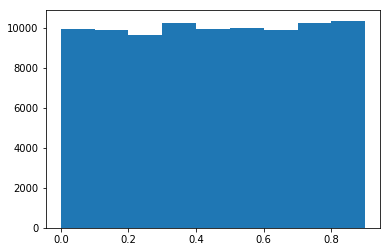

In [8]:
# c
import matplotlib.pyplot as plt

def gcl_with_histogram(seed = 10, iterations = 10, multiplier = 1013904223, addition = 1664525, module = 232):
  results = []
  x = seed
  for _ in range(iterations):
    x = ((multiplier * x + addition) % module) / module
    results.append(x)

  bins = [ bin / 10 for bin in range(10) ]
  plt.hist(results, bins)
  plt.show()

gcl_with_histogram(iterations= 100000)

### Punto 3

Aplicando el algoritmo de Aceptación y rechazo se pide:

* Generar 100.000 número aleatorios con distribución Normal de media 15 y desvío estándar 3 .
* Realizar un histograma de frecuencias relativas con todos los valores obtenidos.
* Comparar, en el mismo gráfico, el histograma realizado en el punto anterior con la función de densidad de probabilidad brindada por Matlab, Octave o Python (para esta última distribución utilizar un gráfico de línea).
* Calcular la media y la varianza de la distribución obtenida y compararlos con los valores teóricos.
* Calcule el factor de rendimiento del método.

In [2]:
from math import sqrt, exp, pi
import numpy as np
from numpy.random import exponential, rand, normal
import matplotlib.pyplot as plt
from time import time


def normal_distribution(x, mu, sigma):
    exponent = (-1) * (x - mu) ** 2 / (2 * (sigma ** 2))
    scalar = 1/(sigma * sqrt(2 * pi))
    return scalar * exp(exponent)


def exponential_distribution(y, _lambda):
    return _lambda * exp((-1) * _lambda * y)


def c_value(mu, sigma, _lambda):
    t = sigma ** 2 * _lambda
    f_x_t = normal_distribution(t, mu, sigma)
    f_y_t = exponential_distribution(t, _lambda)
    return f_x_t/f_y_t


def generate_normal(mu, sigma, _lambda, n):
    samples = exponential(1 / _lambda, n)
    samples = [sample+mu for sample in samples]
    c = c_value(mu, sigma, _lambda)
    f_x = lambda x: normal_distribution(x, mu, sigma)
    f_y = lambda x: exponential_distribution(x, _lambda)
    p = [f_x(t)/(c * f_y(t)) for t in samples]
    z = []
    percentage_of_rejections = 0
    total = 0
    i = 0
    while i < n:
        if rand() >= p[i]:
            percentage_of_rejections += 1
            total += 1
            continue
        if rand() < 0.5:
            z.append(samples[i])
        else:
            z.append((-1)*samples[i]+2*mu)
        total += 1
        i += 1
    percentage_of_rejections = percentage_of_rejections / total
    return z, percentage_of_rejections


def map_relative_frequencies(values):
    size = len(values)
    freq = {}
    for val in values:
        if val in freq:
            freq[val] += 1
        else:
            freq[val] = 0
    return list(map(lambda x: float(x/size), freq.values()))


def relative_frequency_histogram(plt, values):
    return plt.hist(values, histtype='barstacked', density=True)


def graph_normal_density_function(plt, mu, sigma, n):
    x = normal(loc=mu, scale=sigma, size=n)
    x.sort()
    y = [normal_distribution(t, mu, sigma) for t in x]
    label = 'normal'
    plt.plot(x, y, color='C2', label=label, ls='--')
    plt.legend(loc='upper right')

('time elapsed: ', 0.46865296363830566, 'seconds')


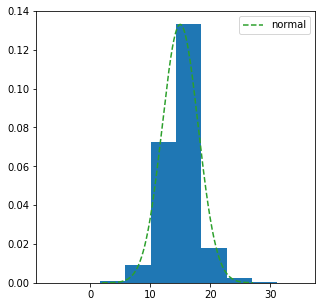

('mu:', 15.001291993004909, '- error: ', 0.0012919930049086759)
('actual sigma: ', 8.063187372025235, '- error: ', 0.9368126279747653)
('percentage_of_rejections:', 0)


In [8]:
mu = 15
sigma = 3
variance = sigma**2
_lambda = 0.5
n = 100000
start = time()
normal_values, percentage_of_rejections = generate_normal(mu, sigma, _lambda, n)
time_elapsed = time() - start
print("time elapsed: ", time_elapsed, "seconds")
plt.figure(figsize=(5, 5))
relative_frequency_histogram(plt, normal_values)
graph_normal_density_function(plt, mu, sigma, n)
plt.show()
actual_mean = np.mean(normal_values)
mean_error = abs(mu - actual_mean)
print("mu:", actual_mean, "- error: ", mean_error)
actual_variance = np.std(normal_values, ddof=1)**2
variance_error = abs(variance - actual_variance)
print("actual sigma: ", actual_variance, "- error: ", variance_error)
print("percentage_of_rejections:"  ,percentage_of_rejections)